## System Setup

In [1]:
# Find CPU info
!grep -m1 'model name' /proc/cpuinfo | awk -F": " '{print $2}'
!grep 'cpu cores' /proc/cpuinfo | awk -F": " '{a[cores]+=$2}END{print "CPU cores: " a[cores]}'

Intel(R) Xeon(R) CPU @ 2.20GHz
CPU cores: 8


In [2]:
# Find Ram Info
!grep MemTotal /proc/meminfo | awk '{printf "%.1fGB RAM", $2 / 1024 / 1024}'

25.5GB RAM

In [3]:
# Find GPU info
!nvidia-smi

Sun Jul 23 16:49:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!python --version

Python 3.10.6


In [5]:
!R --version

R version 4.1.2 (2021-11-01) -- "Bird Hippie"
Copyright (C) 2021 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [6]:
#Install torch manually from prebuilt binaries since colab use cu11.8 which does not build
!wget https://storage.googleapis.com/torch-lantern-builds/packages/cu117/0.11.0/src/contrib/torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz
!Rscript -e 'install.packages("torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz", repos = NULL)'

--2023-07-23 16:49:27--  https://storage.googleapis.com/torch-lantern-builds/packages/cu117/0.11.0/src/contrib/torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/gzip]
Saving to: ‘torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz’

torch_0.11.0_R_x86_     [              <=>   ]   1.83G  96.0MB/s    in 20s     

2023-07-23 16:49:47 (95.4 MB/s) - ‘torch_0.11.0_R_x86_64-pc-linux-gnu.tar.gz’ saved [1966658359]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
* installing *binary* package ‘torch’ ...
* DONE (torch)


In [7]:
# Install BKTR
!Rscript -e "library(devtools); devtools::install_github('julien-hec/BKTR', ref = 'main')"

Loading required package: usethis
sys          (3.4    -> 3.4.2  ) [CRAN]
openssl      (1.4.6  -> 2.1.0  ) [CRAN]
jsonlite     (1.7.3  -> 1.8.7  ) [CRAN]
curl         (4.3.2  -> 5.0.1  ) [CRAN]
Rcpp         (1.0.8  -> 1.0.11 ) [CRAN]
sp           (NA     -> 2.0-0  ) [CRAN]
png          (NA     -> 0.1-8  ) [CRAN]
utf8         (1.2.2  -> 1.2.3  ) [CRAN]
colorspace   (2.0-2  -> 2.1-0  ) [CRAN]
pillar       (1.7.0  -> 1.9.0  ) [CRAN]
magrittr     (2.0.2  -> 2.0.3  ) [CRAN]
fansi        (1.0.2  -> 1.0.4  ) [CRAN]
viridisLite  (0.4.0  -> 0.4.2  ) [CRAN]
RColorBrewer (1.1-2  -> 1.1-3  ) [CRAN]
farver       (2.1.0  -> 2.1.1  ) [CRAN]
withr        (2.4.3  -> 2.5.0  ) [CRAN]
vctrs        (0.3.8  -> 0.6.3  ) [CRAN]
tibble       (3.1.6  -> 3.2.1  ) [CRAN]
scales       (1.1.1  -> 1.2.1  ) [CRAN]
rlang        (1.0.1  -> 1.1.1  ) [CRAN]
lifecycle    (1.0.1  -> 1.0.3  ) [CRAN]
isoband      (0.2.5  -> 0.2.7  ) [CRAN]
gtable       (0.3.0  -> 0.3.3  ) [CRAN]
glue         (1.6.1  -> 1.6.2  ) [CRAN]
cli   

In [8]:
# Ragg was causing some issues when saving plots on this machine, seems to be
# caused by incompatible versions so we reinstall it
!Rscript -e "install.packages('ragg')"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘systemfonts’, ‘textshaping’

trying URL 'https://cran.rstudio.com/src/contrib/systemfonts_1.0.4.tar.gz'
Content type 'application/x-gzip' length 81757 bytes (79 KB)
downloaded 79 KB

trying URL 'https://cran.rstudio.com/src/contrib/textshaping_0.3.6.tar.gz'
Content type 'application/x-gzip' length 35722 bytes (34 KB)
downloaded 34 KB

trying URL 'https://cran.rstudio.com/src/contrib/ragg_1.2.5.tar.gz'
Content type 'application/x-gzip' length 427859 bytes (417 KB)
downloaded 417 KB

* installing *source* package ‘systemfonts’ ...
** package ‘systemfonts’ successfully unpacked and MD5 sums checked
** using staged installation
Found pkg-config cflags and libs!
Using PKG_CFLAGS=-I/usr/include/uuid -I/usr/include/freetype2 -I/usr/include/libpng16
Using PKG_LIBS=-lfontconfig -lfreetype
** libs
rm -f systemfonts.so caches.o cpp11.o dev_metrics.o font_matching.o font_registry.o f

## Analysis

In [9]:
sh = """
library(BKTR)
library(ggplot2)

TSR$set_params(seed = 1, fp_type = 'float32', fp_device = 'cuda')
bixi_data <- BixiData$new()

p_lgth <- KernelParameter$new(value = 7, is_fixed = TRUE)
k_local_periodic <- KernelSE$new() * KernelPeriodic$new(period_length = p_lgth)
bktr_regressor <- BKTRRegressor$new(
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  data_df = bixi_data$data_df,
  spatial_positions_df = bixi_data$spatial_positions_df,
  temporal_positions_df = bixi_data$temporal_positions_df,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = k_local_periodic,
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()

summary(bktr_regressor)

fig <- plot_temporal_betas(
    bktr_regressor,
    plot_feature_labels = c('mean_temp_c', 'area_park', 'total_precip_mm'),
    spatial_point_label = '7114 - Smith / Peel') + theme(text=element_text(family='Helvetica'))
ggsave('/content/6_2_temporal_betas_fig.png', fig, width=7, height=4.5, units = 'in')

fig2 <- plot_spatial_betas(
  bktr_regressor,
  plot_feature_labels = c('mean_temp_c', 'area_park', 'total_precip_mm'),
  temporal_point_label = '2019-07-01',
  nb_cols = 3) + theme(text=element_text(family='Helvetica'))
ggsave('/content/6_2_spatial_betas_fig.png', fig2, width=7, height=4, units = 'in')

y_is_na <- is.na(bixi_data$data_df$nb_departure)
nb_y_na <- sum(y_is_na)
sprintf(
  'There is %.d missing `nb_departure` values representing ~%.2f%%',
  nb_y_na,
  nb_y_na / length(y_is_na) * 100)

bixi_data$data_df[which(y_is_na)[1:3], 1:3]

bktr_regressor$imputed_y_estimates[which(y_is_na)[1:3]]
"""
with open('6_bixi_analysis.R', 'w') as file:
  file.write(sh)
!Rscript 6_bixi_analysis.R

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
[W BatchLinearAlgebra.cpp:2121] Warning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (function operator())
[1] "Iter 1     | Elapsed Time:     1.99s | MAE:  0.0941 | RMSE:  0.1289"
[1] "Iter 2     | Elapsed Time:     0.32s | MAE:  0

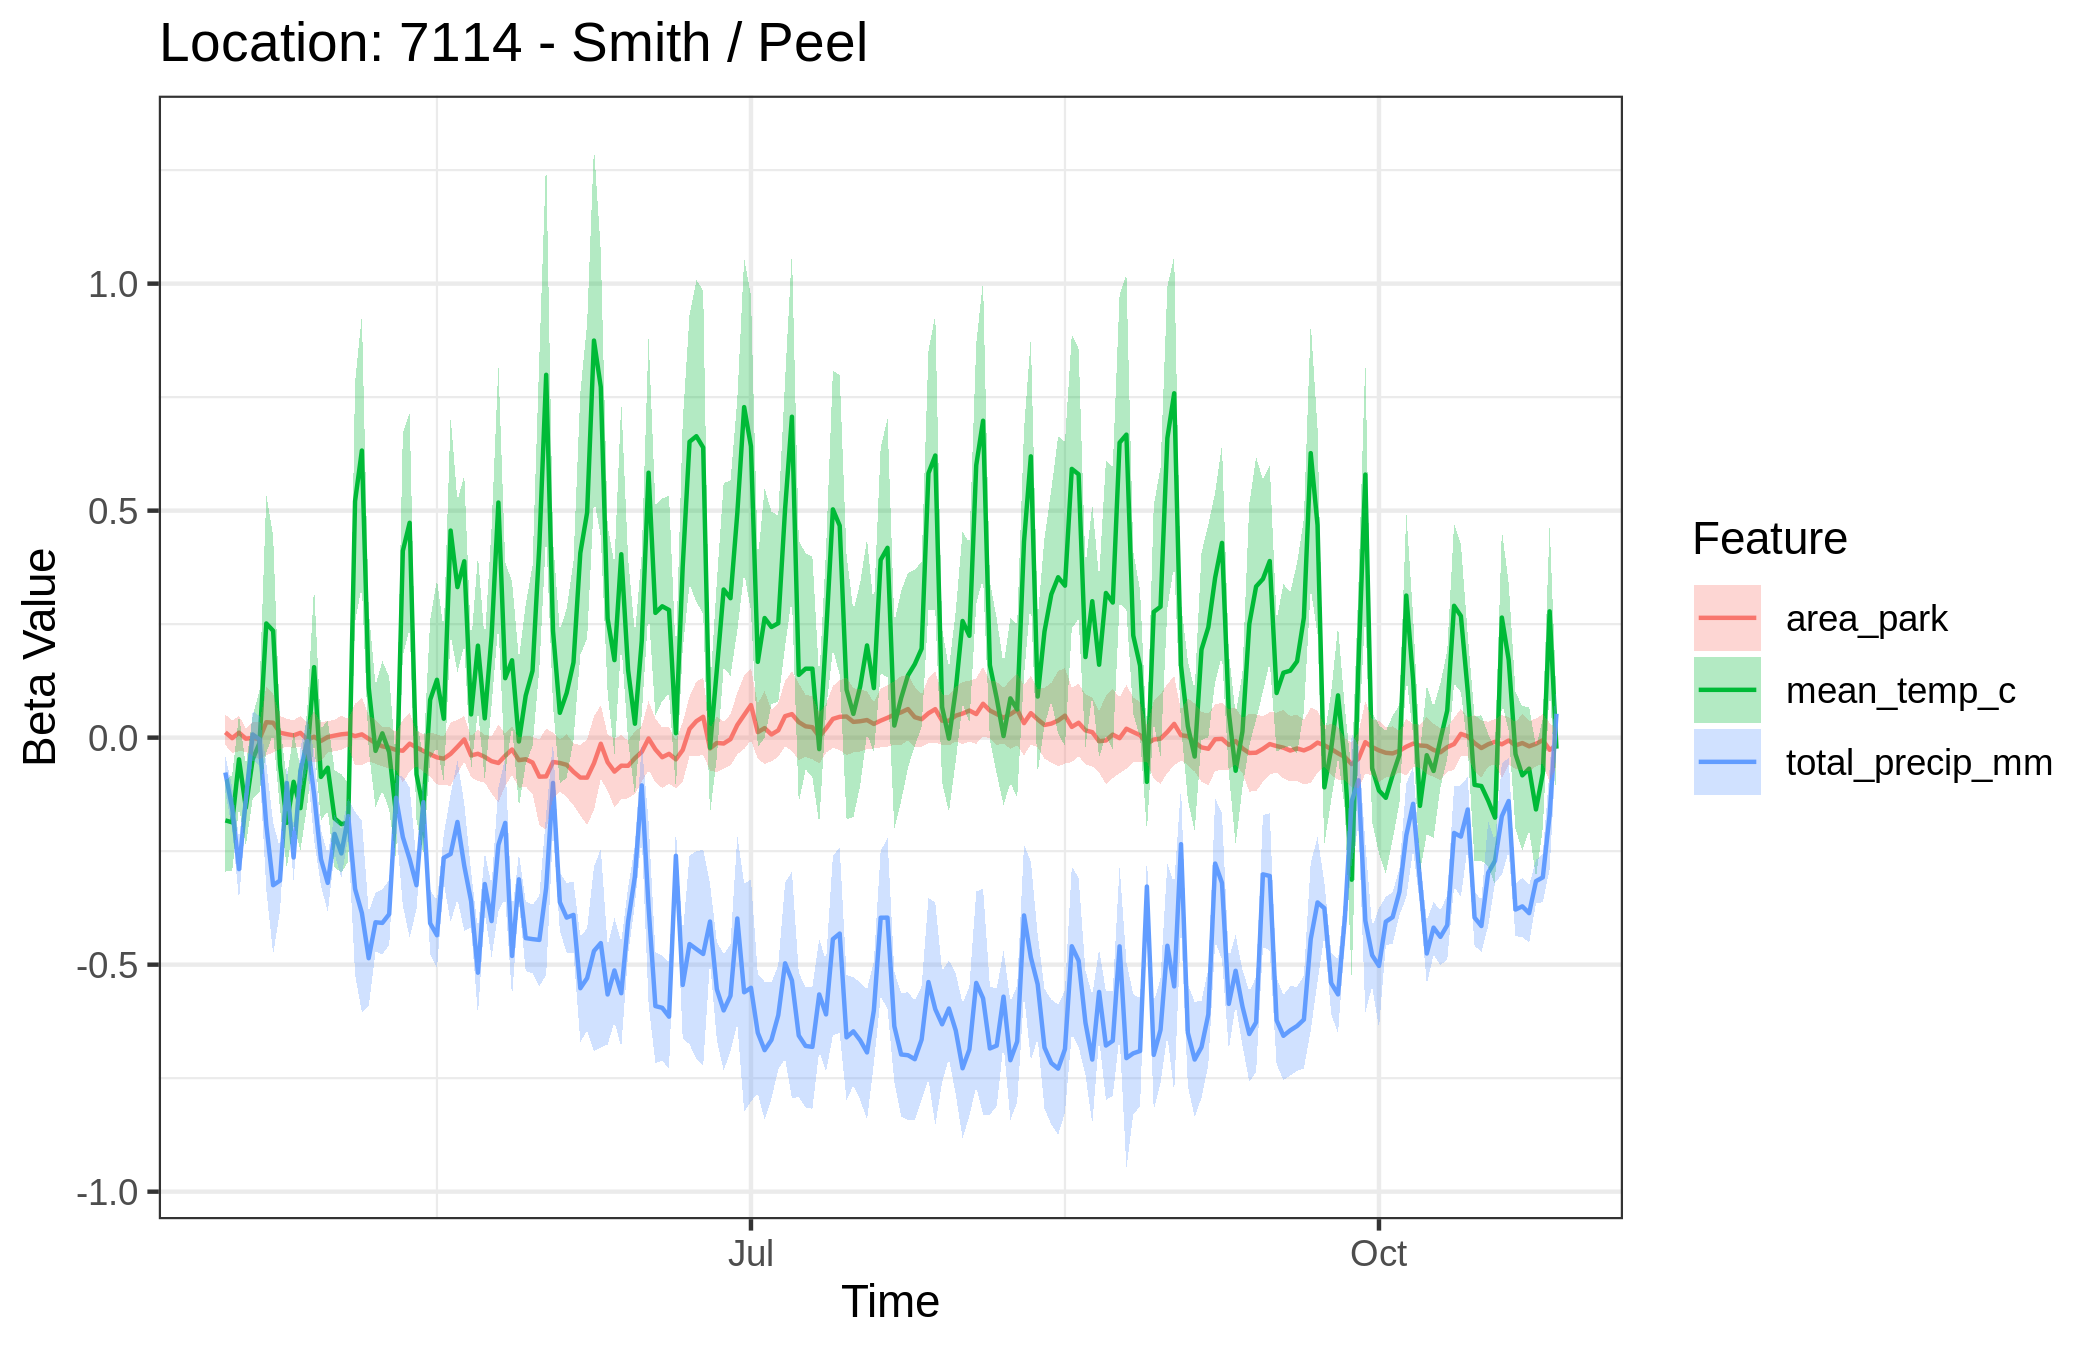

In [10]:
# Simply reopen the saved graph to show it in the notebook
from IPython.display import Image
Image('/content/6_2_temporal_betas_fig.png', width=800)

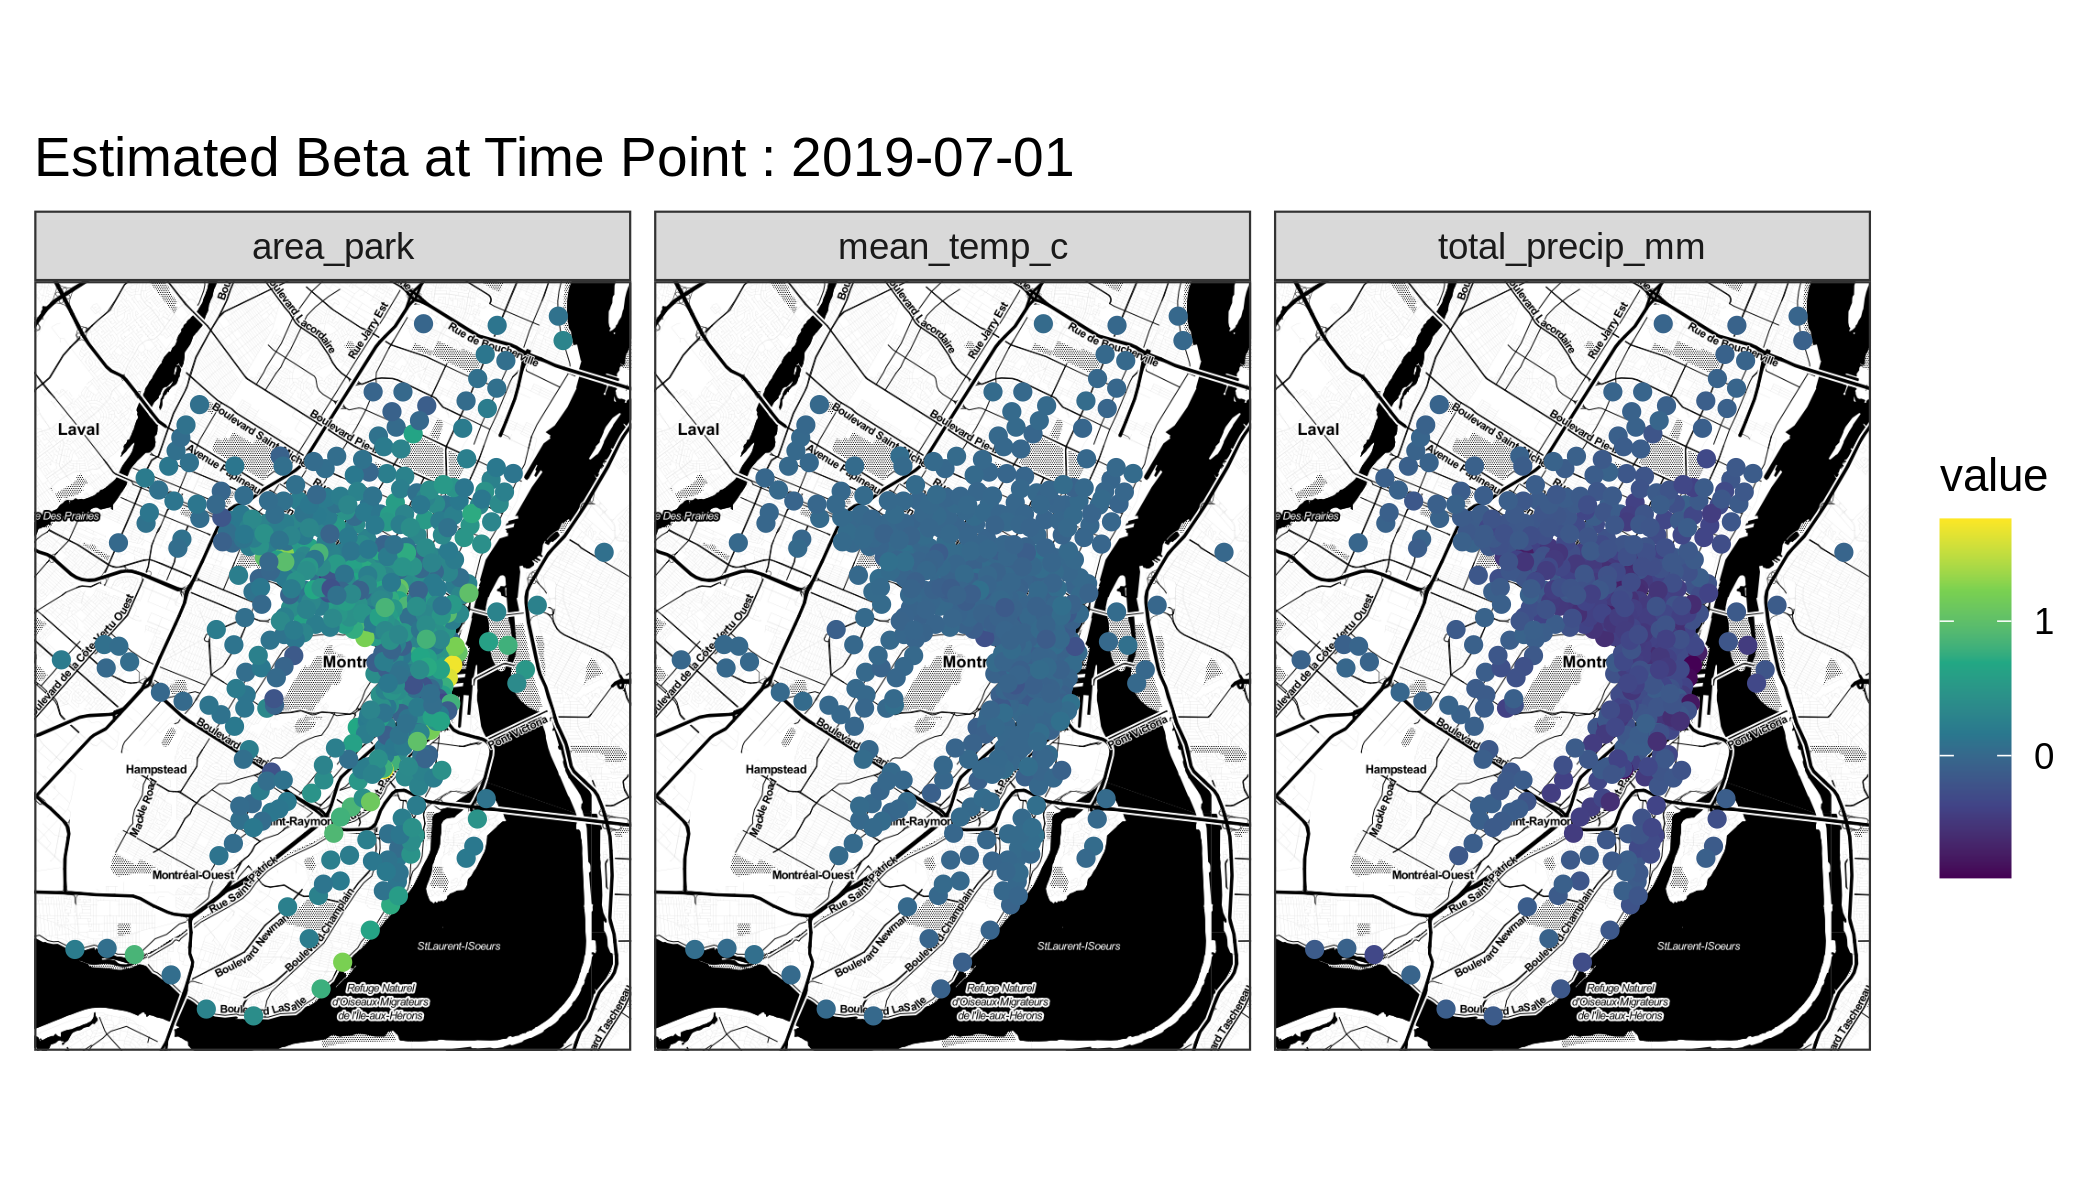

In [11]:
# Simply reopen the saved graph to show it in the notebook
from IPython.display import Image
Image('/content/6_2_spatial_betas_fig.png', width=800)

In [12]:
sh = """library(BKTR)
TSR$set_params(seed = 1, fp_type = 'float32', fp_device = 'cuda')

bixi_data <- BixiData$new()

y_is_na <- is.na(bixi_data$data_df$nb_departure)
y_is_not_na <- which(!y_is_na)
nb_masked_vals <- round(length(y_is_not_na) * 0.2)
masked_indices <- sample(y_is_not_na, nb_masked_vals)
new_data_df <- bixi_data$data_df
new_data_df[masked_indices, 'nb_departure'] <- NA

p_lgth <- KernelParameter$new(value = 7, is_fixed = TRUE)
k_local_periodic <- KernelSE$new() * KernelPeriodic$new(period_length = p_lgth)
bktr_regressor <- BKTRRegressor$new(
   formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
   data_df = new_data_df,
   spatial_positions_df = bixi_data$spatial_positions_df,
   temporal_positions_df = bixi_data$temporal_positions_df,
   rank = 8,
   spatial_kernel = KernelMatern$new(smoothness_factor = 5),
   temporal_kernel = k_local_periodic,
   burn_in_iter = 1000,
   sampling_iter = 500)
bktr_regressor$mcmc_sampling()
y_err <- (bixi_data$data_df$nb_departure[masked_indices]
  - bktr_regressor$imputed_y_estimates$y_est[masked_indices])
sprintf('MAE: %.4f  ||  RMSE: %.4f', mean(abs(y_err)),
sqrt(mean(y_err ^ 2)))
"""
with open('6_bixi_analysis_missing.R', 'w') as file:
  file.write(sh)
!Rscript 6_bixi_analysis_missing.R

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
[W BatchLinearAlgebra.cpp:2121] Warning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (function operator())
[1] "Iter 1     | Elapsed Time:     0.96s | MAE:  0.1153 | RMSE:  0.1605"
[1] "Iter 2     | Elapsed Time:     0.35s | MAE:  0

In [43]:
sh = """library(BKTR)
library(data.table)
TSR$set_params(seed=0, fp_type='float32', fp_device='cuda')
bixi_data <- BixiData$new()
data_df <- bixi_data$data_df
spa_df <- bixi_data$spatial_positions_df
tem_df <- bixi_data$temporal_positions_df

new_s = c(
  '4002 - Graham / Wicksteed',
  '7079 - Notre-Dame / Gauvin',
  '6236 - Laurier / de Bordeaux'
)
new_t <- c('2019-05-01', '2019-05-02')
new_t <- as.IDate(new_t)
# Get obs data
obs_s = setdiff(unlist(spa_df$location), new_s)
obs_t = setdiff(unlist(tem_df$time), new_t)

obs_data_df <- data_df[data_df[, .I[
  location %in% obs_s & time %in% obs_t]], ]
obs_spa_df <- spa_df[spa_df[, .I[location %in% obs_s]], ]
obs_tem_df <- tem_df[tem_df[,.I[time %in% obs_t]], ]
# Get new data
new_data_df <- data_df[data_df[, .I[
  location %in% new_s | time %in% new_t]], ]
new_spa_df <- spa_df[spa_df[, .I[location %in% new_s]], ]
new_tem_df <- tem_df[tem_df[, .I[time %in% new_t]], ]


bktr_regressor <- BKTRRegressor$new(
  data_df = obs_data_df,
  spatial_positions_df = obs_spa_df,
  temporal_positions_df = obs_tem_df,
  #... other parameters like section 6.1
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = (
    KernelSE$new() *
      KernelPeriodic$new(period_length = KernelParameter$new(value = 7, is_fixed = TRUE))
  ),
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()
preds <- bktr_regressor$predict(
  new_data_df,
  new_spa_df,
  new_tem_df
)
new_data_df <- data_df[data_df[, .I[location %in% new_s | time %in% new_t]], c('location', 'time', 'nb_departure')]
pred_y_df <- preds$new_y_df
# Sort data for comparison and remove na values
setkey(new_data_df, location, time)
setkey(pred_y_df, location, time)
non_na_indices <- which(!is.na(new_data_df$nb_departure))

y_err <- new_data_df$nb_departure[non_na_indices] - pred_y_df$y_est[non_na_indices]
sprintf('Predicting %d y values || MAE: %.4f || RMSE: %.4f',
        length(non_na_indices), mean(abs(y_err)), sqrt(mean(y_err ^ 2)))
"""
with open('6_bixi_analysis_interpol.R', 'w') as file:
  file.write(sh)
!Rscript 6_bixi_analysis_interpol.R

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
[W BatchLinearAlgebra.cpp:2121] Warning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (function operator())
[1] "Iter 1     | Elapsed Time:     1.06s | MAE:  0.1027 | RMSE:  0.1405"
[1] "Iter 2     | Elapsed Time:     0.46s | MAE:  0